In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

/kaggle/input/the-boston-houseprice-data/boston.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Предварительная обработка данных

1. Посмотреть на пропуски. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [5]:
print(df.info())  # Сведения о типах данных и пропусках
print(df.describe())  # Статистическое описание числовых колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Посмотрим на уникальные значения признаков с типом object
> *Let's look at the unique values of features with the object data type.*

In [6]:
object_columns = df.select_dtypes(include=['object'])

for column in object_columns.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print('-' * 50)  # Separator for readability


Unique values in column 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
Unique values in column 'Street':
['Pave' 'Grvl']
--------------------------------------------------
Unique values in column 'Alley':
[nan 'Grvl' 'Pave']
--------------------------------------------------
Unique values in column 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
Unique values in column 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Unique values in column 'Utilities':
['AllPub' 'NoSeWa']
--------------------------------------------------
Unique values in column 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
Unique values in column 'LandSlope':
['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Unique values in column 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 

In [7]:
# посмотри где в чиловых столбцах есть nan

float_columns = df.select_dtypes(include=['float'])
float_columns



LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

In [8]:
# посмотри где в чиловых столбцах есть nan

float_columns = df.select_dtypes(include=['int']).columns
float_columns



Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Обработаем числовые признаки

In [9]:
# Фасад участка: Линейный отрезок улицы, соединенный с объектом недвижимости
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

## Аккуратно обработаем объектные признаки

In [10]:
# Выход к аллее
df['Alley'] = df['Alley'].fillna('None')

**Обрати внимание**

25  MasVnrType     588 non-null    object 

26  MasVnrArea     1452 non-null   float64

**Для этих значение заполним модой**

In [11]:
# Вывод данных до замены
print('До замены', df.loc[df['MasVnrType'].isna() & (df['MasVnrArea'] > 0), ['MasVnrType', 'MasVnrArea']], sep='\n')

# Замена пропусков в MasVnrType на моду, если MasVnrArea > 0
df.loc[df['MasVnrType'].isna() & (df['MasVnrArea'] > 0), 'MasVnrType'] = df['MasVnrType'].mode()[0]

# Вывод данных после замены
print('После замены незаполненные данные исчезли', df.loc[df['MasVnrType'].isna() & (df['MasVnrArea'] > 0), ['MasVnrType', 'MasVnrArea']], sep='\n')

До замены
     MasVnrType  MasVnrArea
624         NaN       288.0
773         NaN         1.0
1230        NaN         1.0
1300        NaN       344.0
1334        NaN       312.0
После замены незаполненные данные исчезли
Empty DataFrame
Columns: [MasVnrType, MasVnrArea]
Index: []


**Для остальных None**

In [12]:
# Заполнить пропуски специальной категорией 'None'
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrType'].isnull().sum()

/tmp/ipykernel_30/1252169076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace=True)


0

**Обработаем камины**

56  Fireplaces     1460 non-null   int64  

57  FireplaceQu    770 non-null    object

Мы видим, что для 0 каминов FireplaceQu - Nan

In [13]:
# Вывод данных до замены
print('Before', df.loc[df['Fireplaces'] == 0, ['Fireplaces', 'FireplaceQu']].head(), sep='\n')

# Замена значений на 'None' там, где Fireplaces == 0
df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = df.loc[df['Fireplaces'] == 0, 'FireplaceQu'].fillna('None')

# Вывод данных после замены
print('After', df.loc[df['Fireplaces'] == 0, ['Fireplaces', 'FireplaceQu']].head(), sep='\n')


Before
    Fireplaces FireplaceQu
0            0         NaN
5            0         NaN
10           0         NaN
12           0         NaN
15           0         NaN
After
    Fireplaces FireplaceQu
0            0        None
5            0        None
10           0        None
12           0        None
15           0        None


 71  PoolArea       1460 non-null   int64 
 
 72  PoolQC         7 non-null      object 
 
 73  Fence          281 non-null    object 
 
 74  MiscFeature    54 non-null     object 
 
 75  MiscVal        1460 non-null   int64 

In [14]:
print('unique', df['PoolArea'].unique(), 'sun nan', df['PoolArea'].isnull().sum())
# получается в выборке 7 бассейнов остально nan

unique [  0 512 648 576 555 480 519 738] sun nan 0


In [15]:
df.loc[df['PoolQC'].notnull(), ['PoolArea', 'PoolQC']]

PoolArea PoolQC
197        512     Ex
810        648     Fa
1170       576     Gd
1182       555     Ex
1298       480     Gd
1386       519     Fa
1423       738     Gd

In [16]:
df['PoolQC'] = df['PoolQC'].fillna('None')

In [17]:
df.loc[df['PoolQC'] == 'None', ['PoolArea', 'PoolQC']]

PoolArea PoolQC
0            0   None
1            0   None
2            0   None
3            0   None
4            0   None
...        ...    ...
1455         0   None
1456         0   None
1457         0   None
1458         0   None
1459         0   None

[1453 rows x 2 columns]

In [18]:
df.loc[(df['MiscVal'] == 0) & (df['MiscFeature'].isnull()) , ['MiscFeature', 'MiscVal']]

MiscFeature  MiscVal
0            NaN        0
1            NaN        0
2            NaN        0
3            NaN        0
4            NaN        0
...          ...      ...
1454         NaN        0
1455         NaN        0
1456         NaN        0
1458         NaN        0
1459         NaN        0

[1406 rows x 2 columns]

In [19]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [20]:
df['Fence'] = df['Fence'].fillna('None')

In [21]:
object_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
df['Electrical'].mode()[0]

'SBrkr'

In [23]:
# заменим все остальное на моды
object_columns = df.select_dtypes(include=['object'])

for column in object_columns.columns:
    df[column] = df[column].fillna(df[column].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
float_columns = df.select_dtypes(include=['float'])
for column in float_columns.columns:
    df[column] = df[column].fillna(df[column].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

мы закончили заполнять пропуски

# Шаг 2 EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

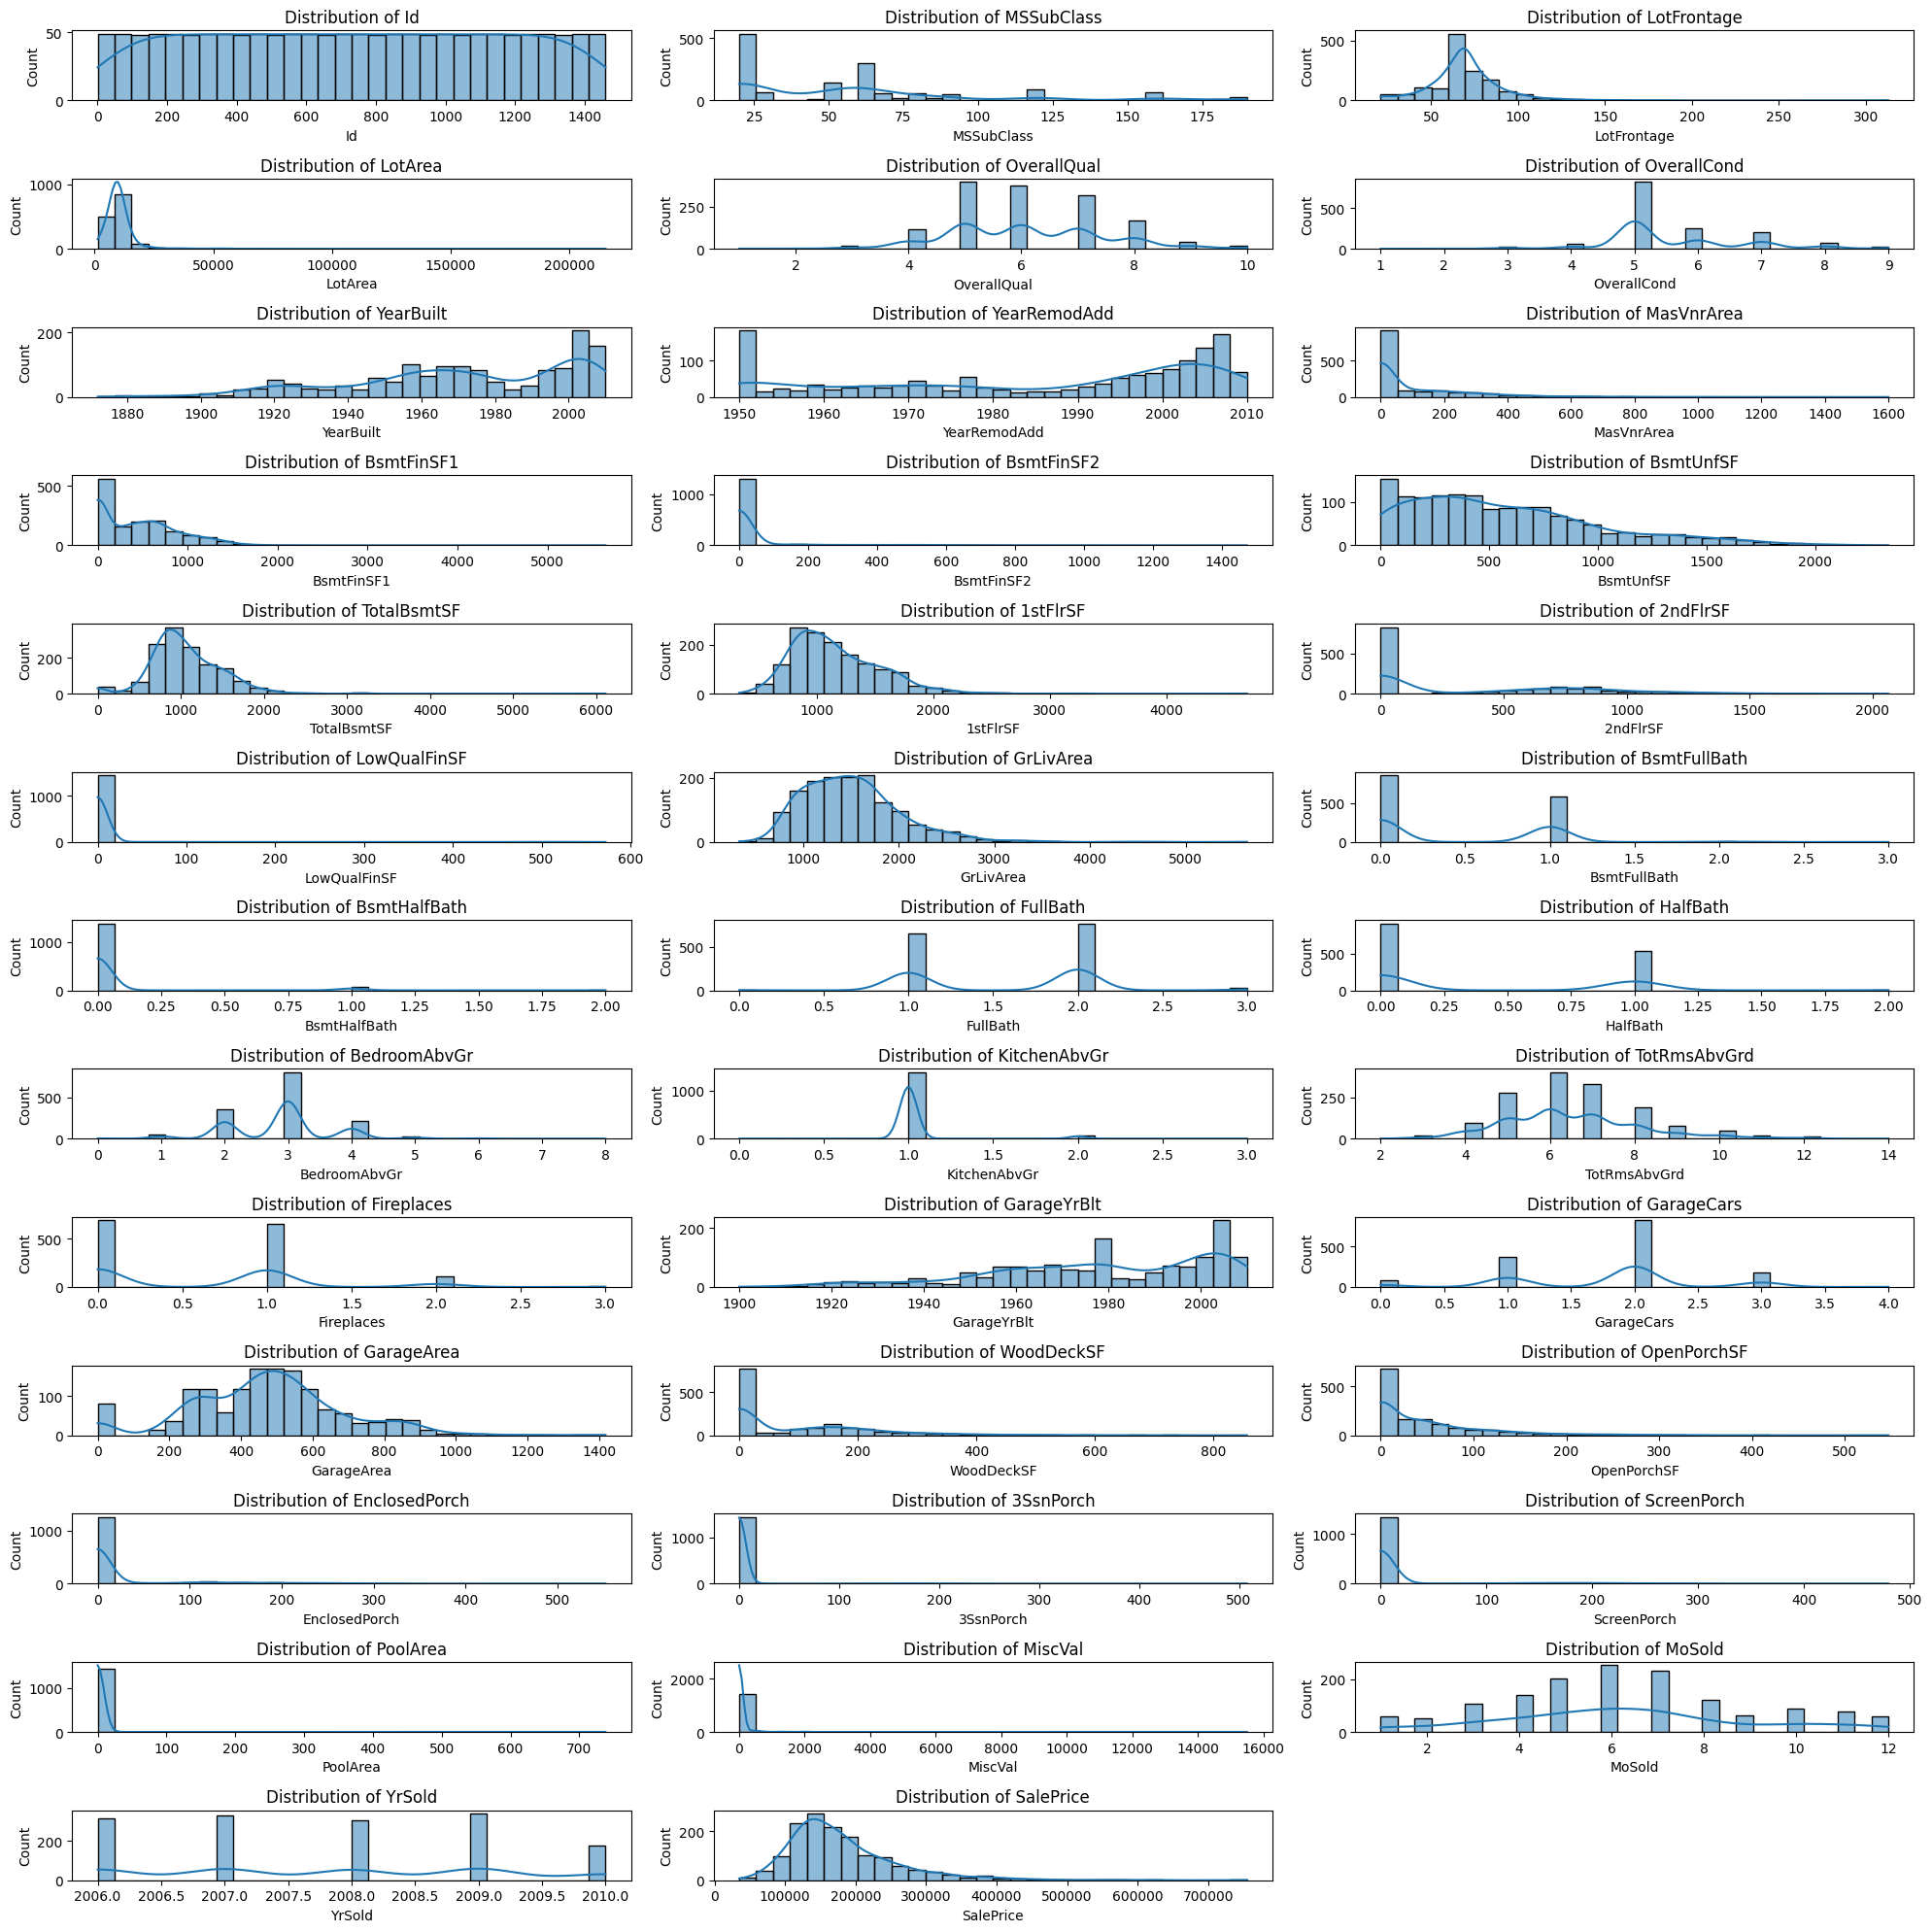

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
num_cols = 3
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // num_cols + 1, num_cols, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


## Построение Boxplot для всех числовых столбцов

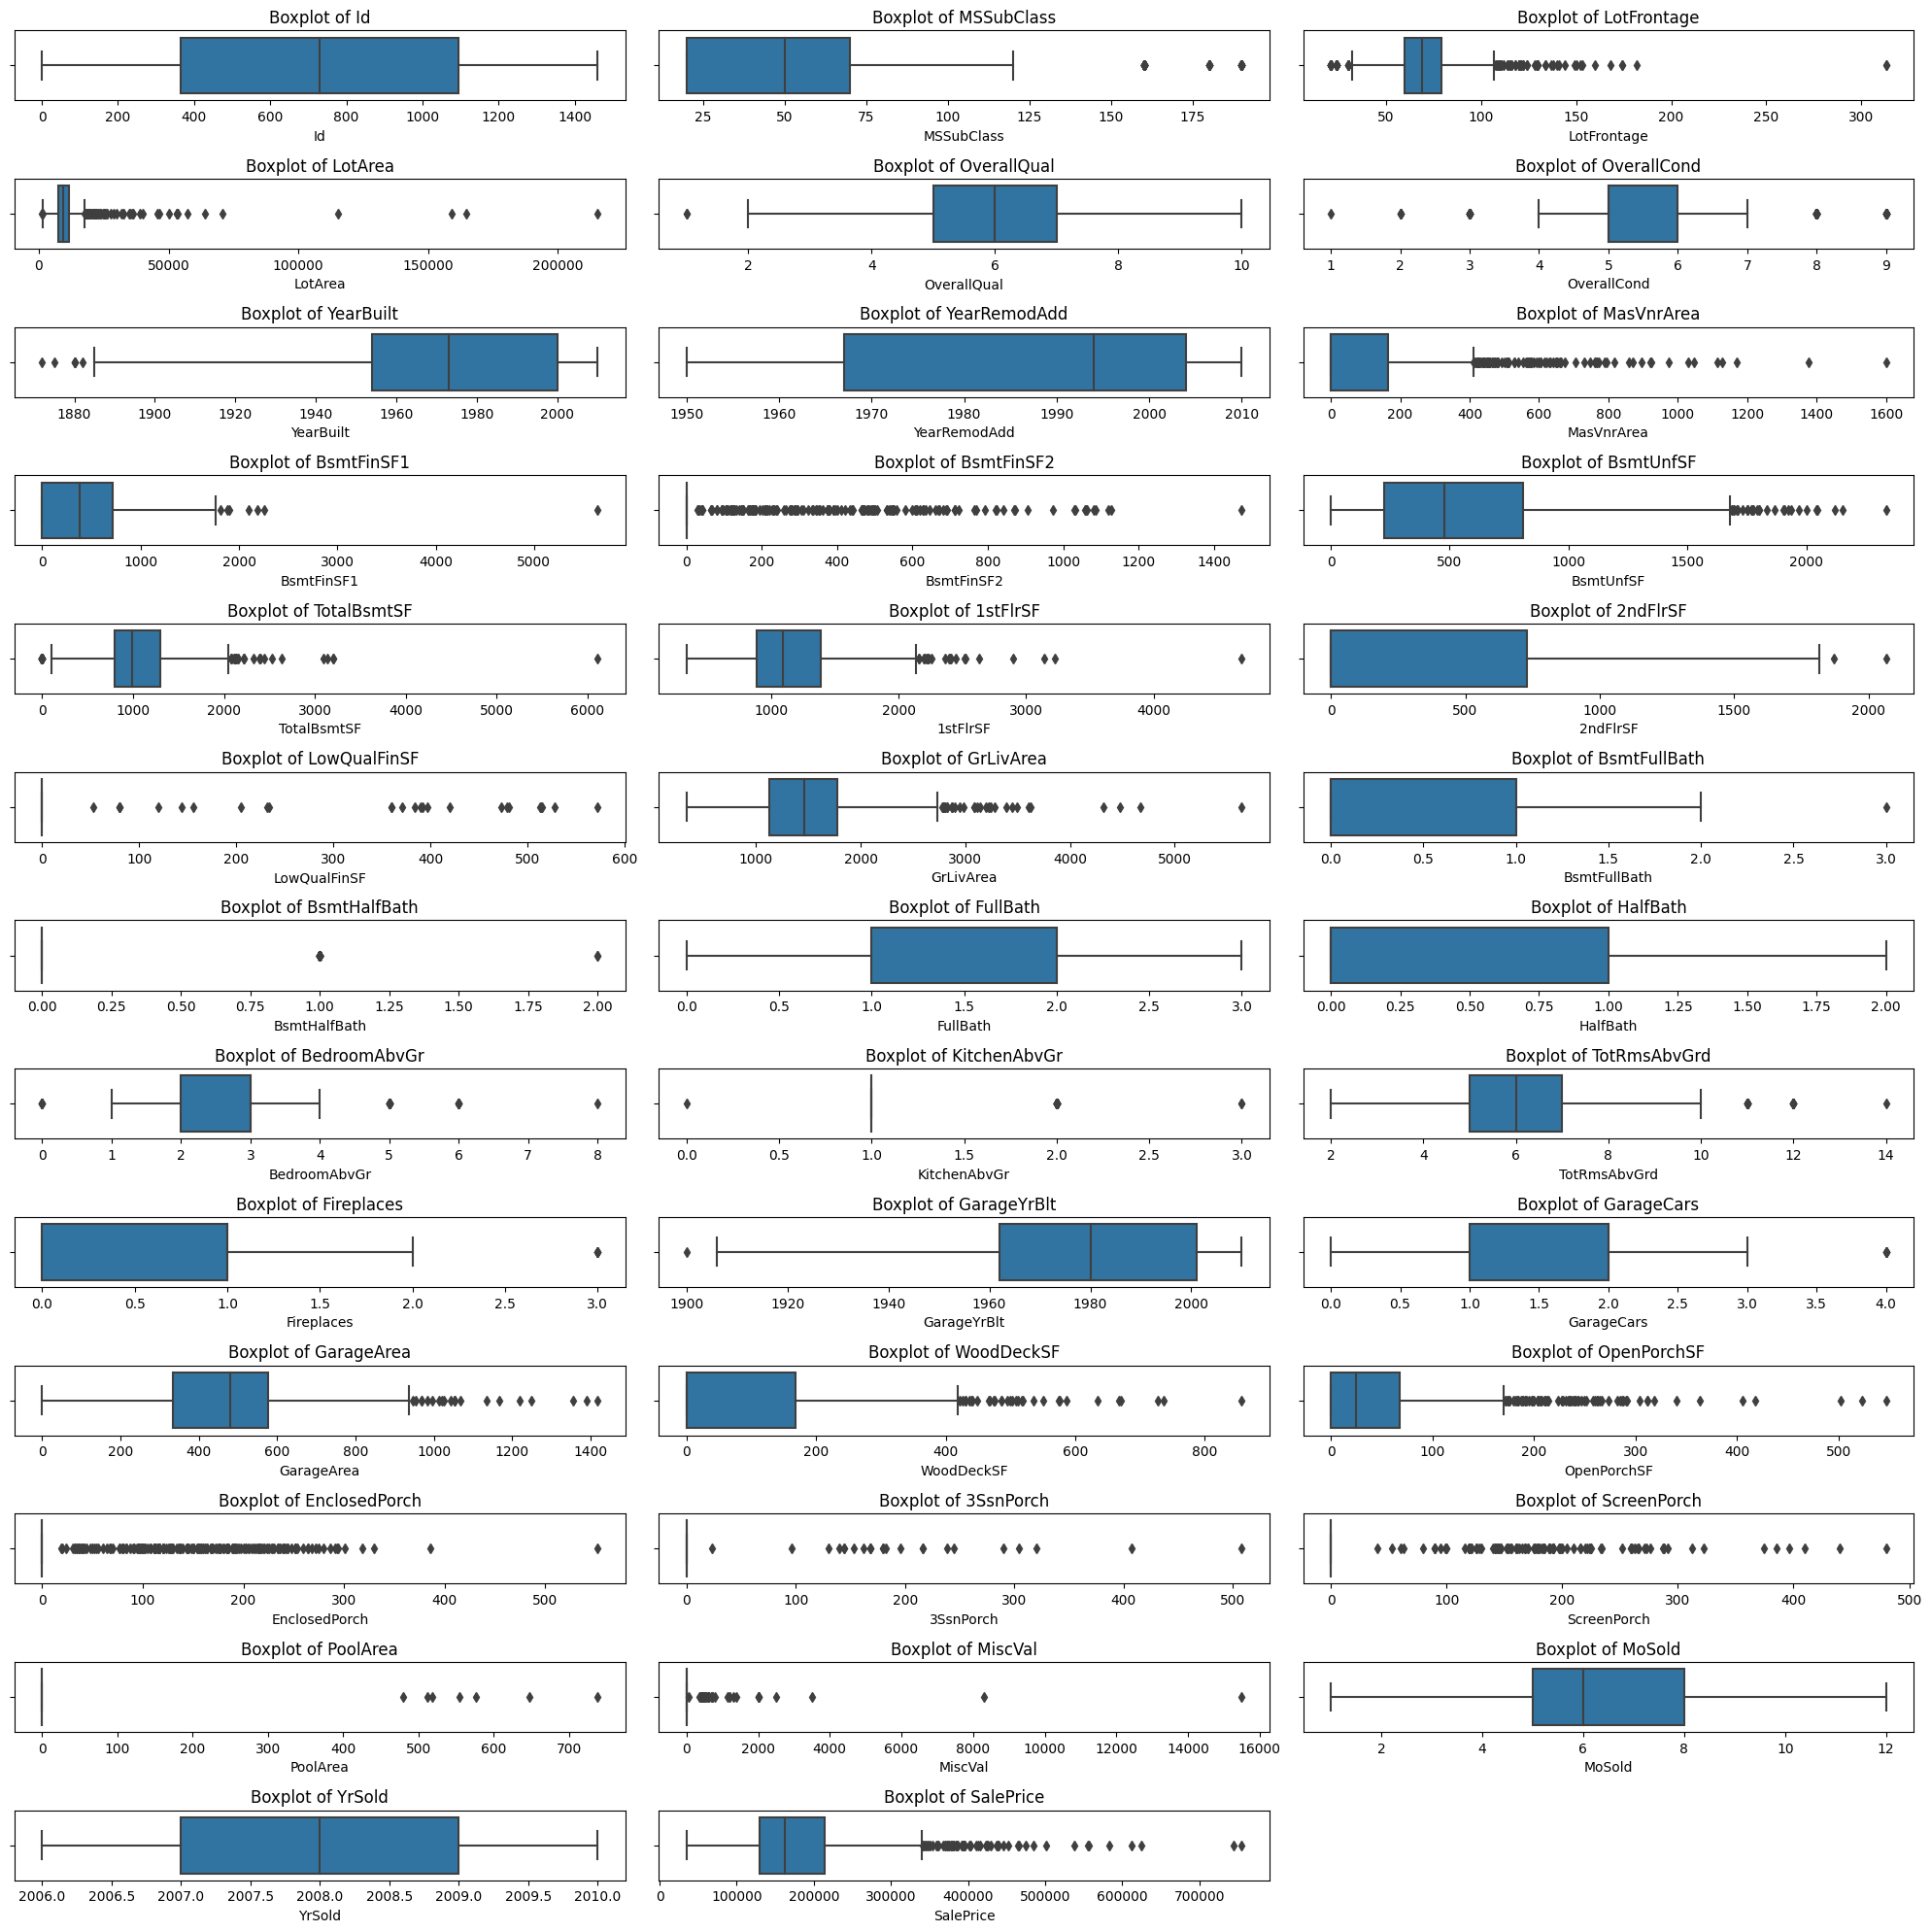

In [26]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // num_cols + 1, num_cols, i)
    
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Как обнаружить выбросы?


In [27]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

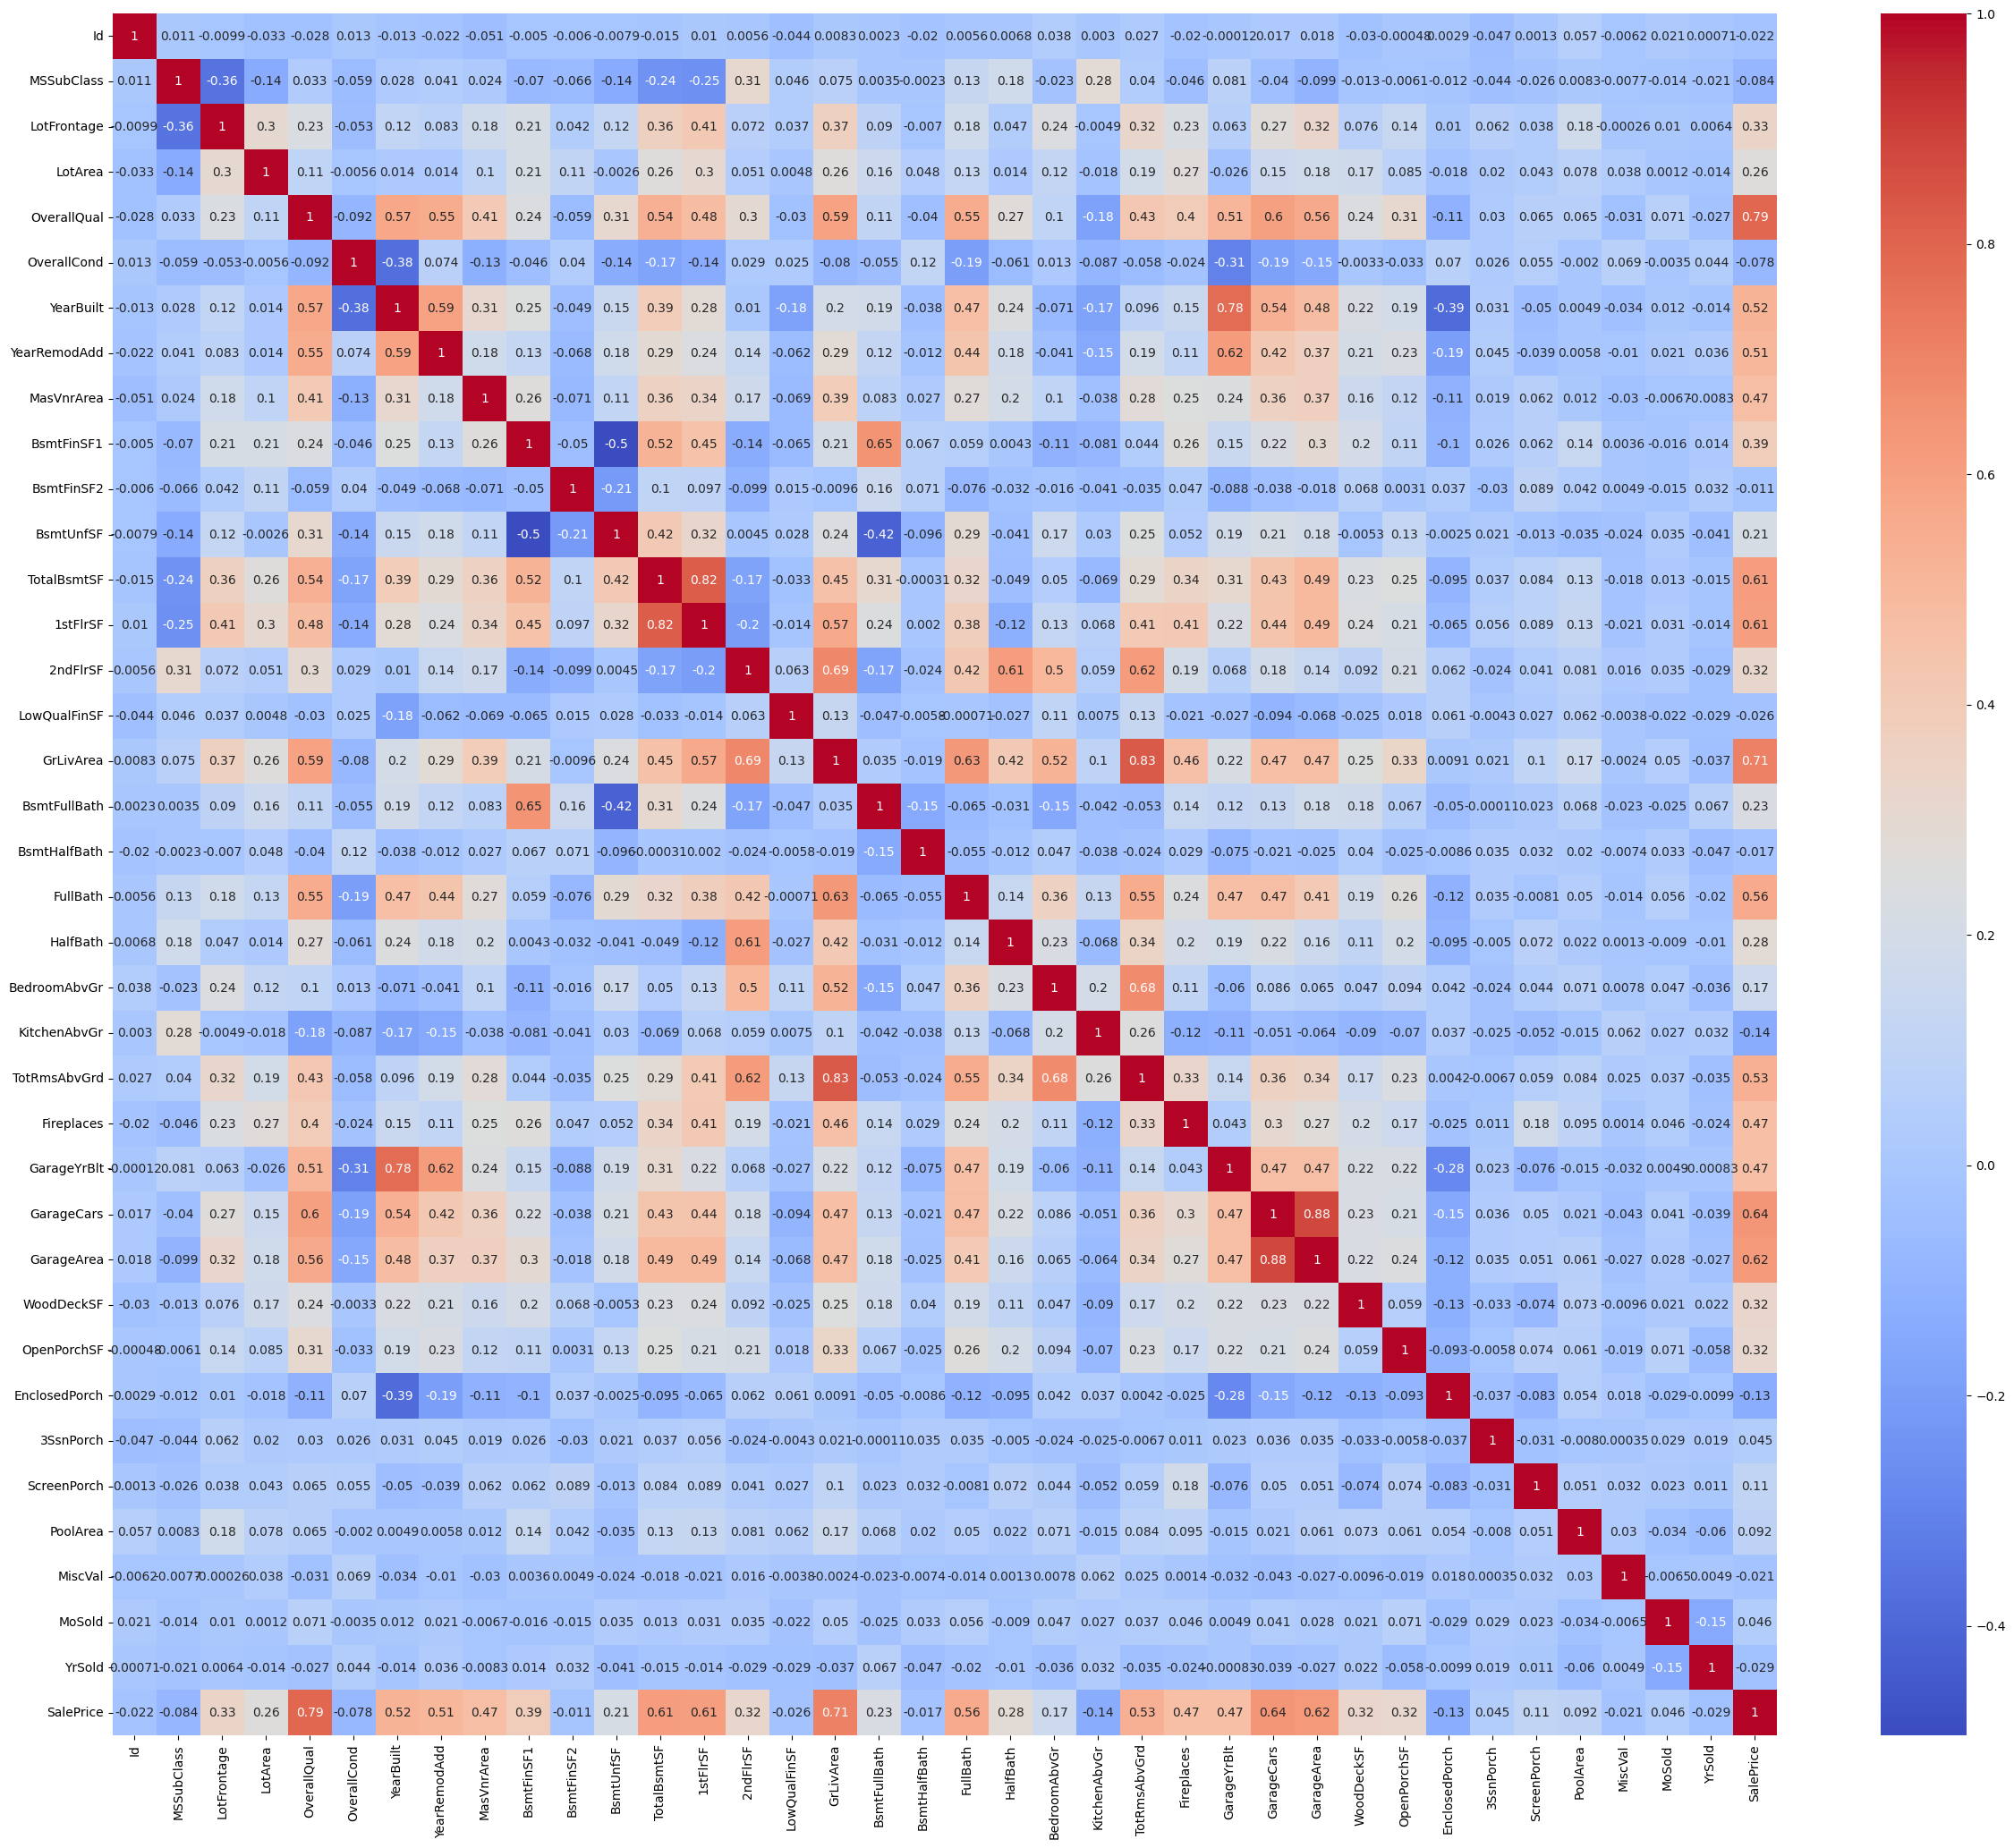

In [28]:
corr = numeric_columns.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
print (corr['SalePrice'].sort_values(ascending=False)[1:6])
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


###  Попробуем найти выбросы

Построим парные графики для чиловыхризнаков

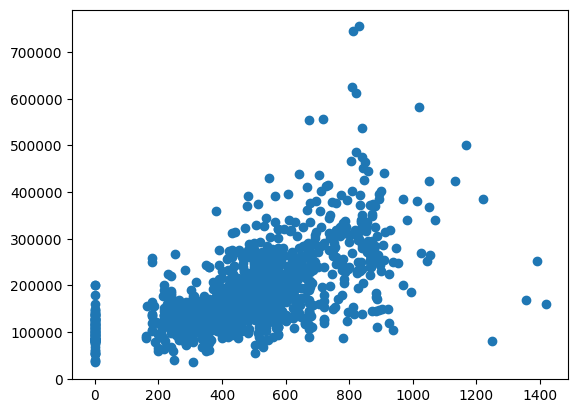

In [31]:
plt.scatter(x=df['GarageArea'], y = df['SalePrice'])

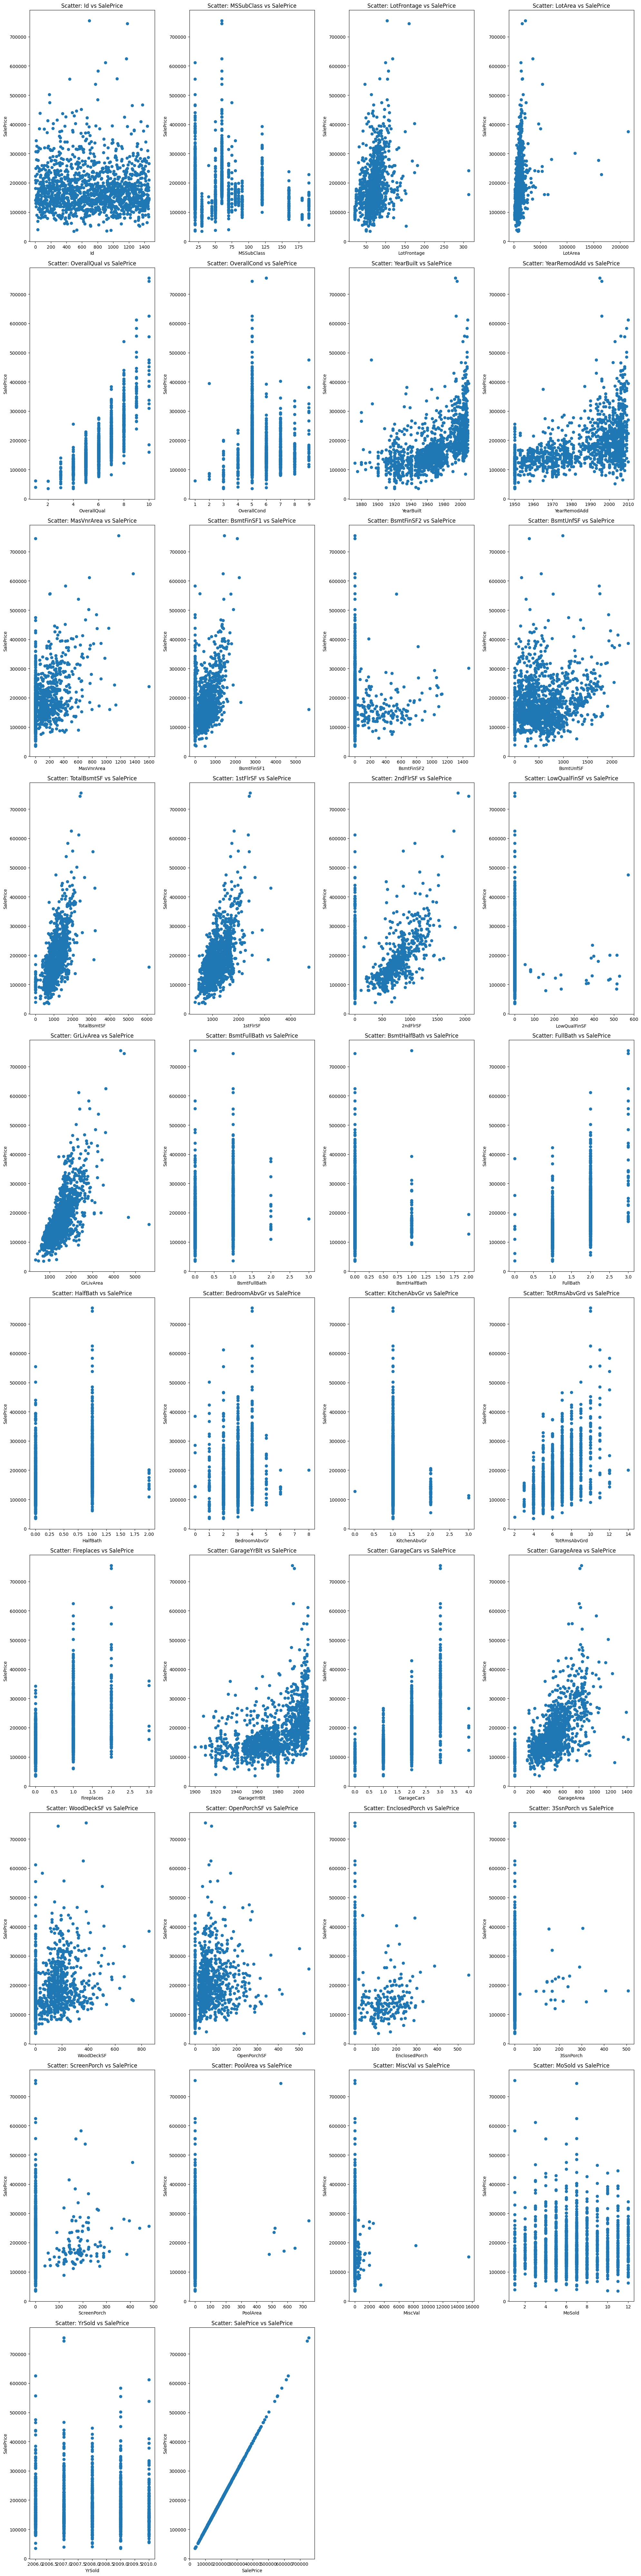

In [32]:


# Пример списка пар признаков для визуализации
features = numeric_columns.columns

# Определяем количество строк и столбцов
nrows = 10
ncols = 4

# Построение нескольких scatter plot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 80))

# Проход по каждому признаку
for i, feature_x in enumerate(features):
    # Определяем индексы строк и столбцов для графика
    row = i // ncols
    col = i % ncols
    
    # Строим scatter plot для каждого признака
    axes[row, col].scatter(df[feature_x], df['SalePrice'])
    axes[row, col].set_xlabel(feature_x)
    axes[row, col].set_ylabel('SalePrice')
    axes[row, col].set_title(f"Scatter: {feature_x} vs SalePrice")

# Удаление пустых графиков, если признаков меньше, чем ячеек
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


**Вывод**

 Выбросы есть, вопрос в том, что с ними делать?
 
 1. Удаление выбросов вручную на основе графиков (визуальный анализ)
 2. Использование статистических методов для обнаружения выбросов
 3. Z-оценка (Z-score)
 4. Логарифмическое преобразование (Log Transformation)
 5. Замена выбросов на границы

### То же самое только с log

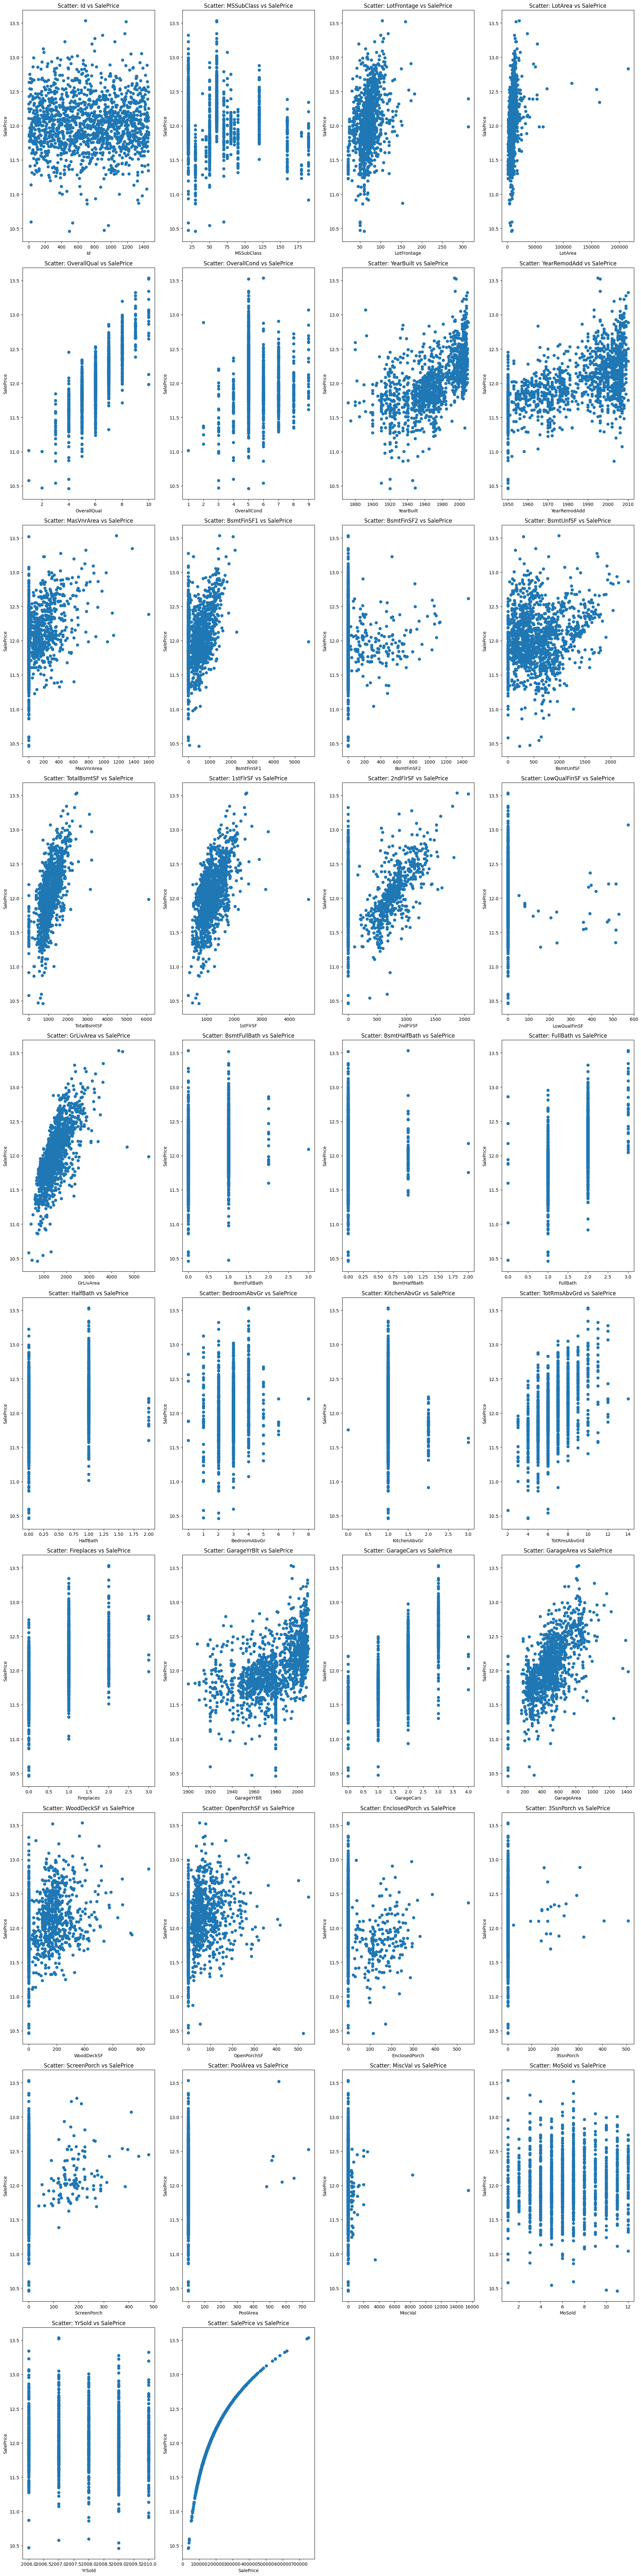

In [33]:


# Пример списка пар признаков для визуализации
features = numeric_columns.columns

# Определяем количество строк и столбцов
ncols = 4
nrows = 10

# Построение нескольких scatter plot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize = (20, 80))

# Проход по каждому признаку
for i, feature_x in enumerate(features):
    # Определяем индексы строк и столбцов для графика
    row = i // ncols
    col = i % ncols  
    # Строим scatter plot для каждого признака
    axes[row, col].scatter(df[feature_x], np.log(df['SalePrice']))
    axes[row, col].set_xlabel(feature_x)
    axes[row, col].set_ylabel('SalePrice')
    axes[row, col].set_title(f"Scatter: {feature_x} vs SalePrice")
    
# Удаление пустых графиков, если признаков меньше, чем ячеек
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


### Попробуем нормализовать данные

Линейные и нелинейные преобразования

Сначала найдем данные, имеющие наибольшую ассиметрию



In [37]:
from scipy.stats import skew
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
s = df[numeric_columns].apply(lambda x: skew(x.dropna()))

s_features = s[(s > 1) | (s < -1)].index
print("Признаки с сильной асимметрией:", s_features)

Признаки с сильной асимметрией: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')


а теперь применим для них преобразования Бокса-Кокса)))

In [40]:
from scipy.stats import boxcox

for feature in s_features:
    df[feature], _ = boxcox(df[feature] + 1) # Добавляем 1, чтобы избежать значений <= 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

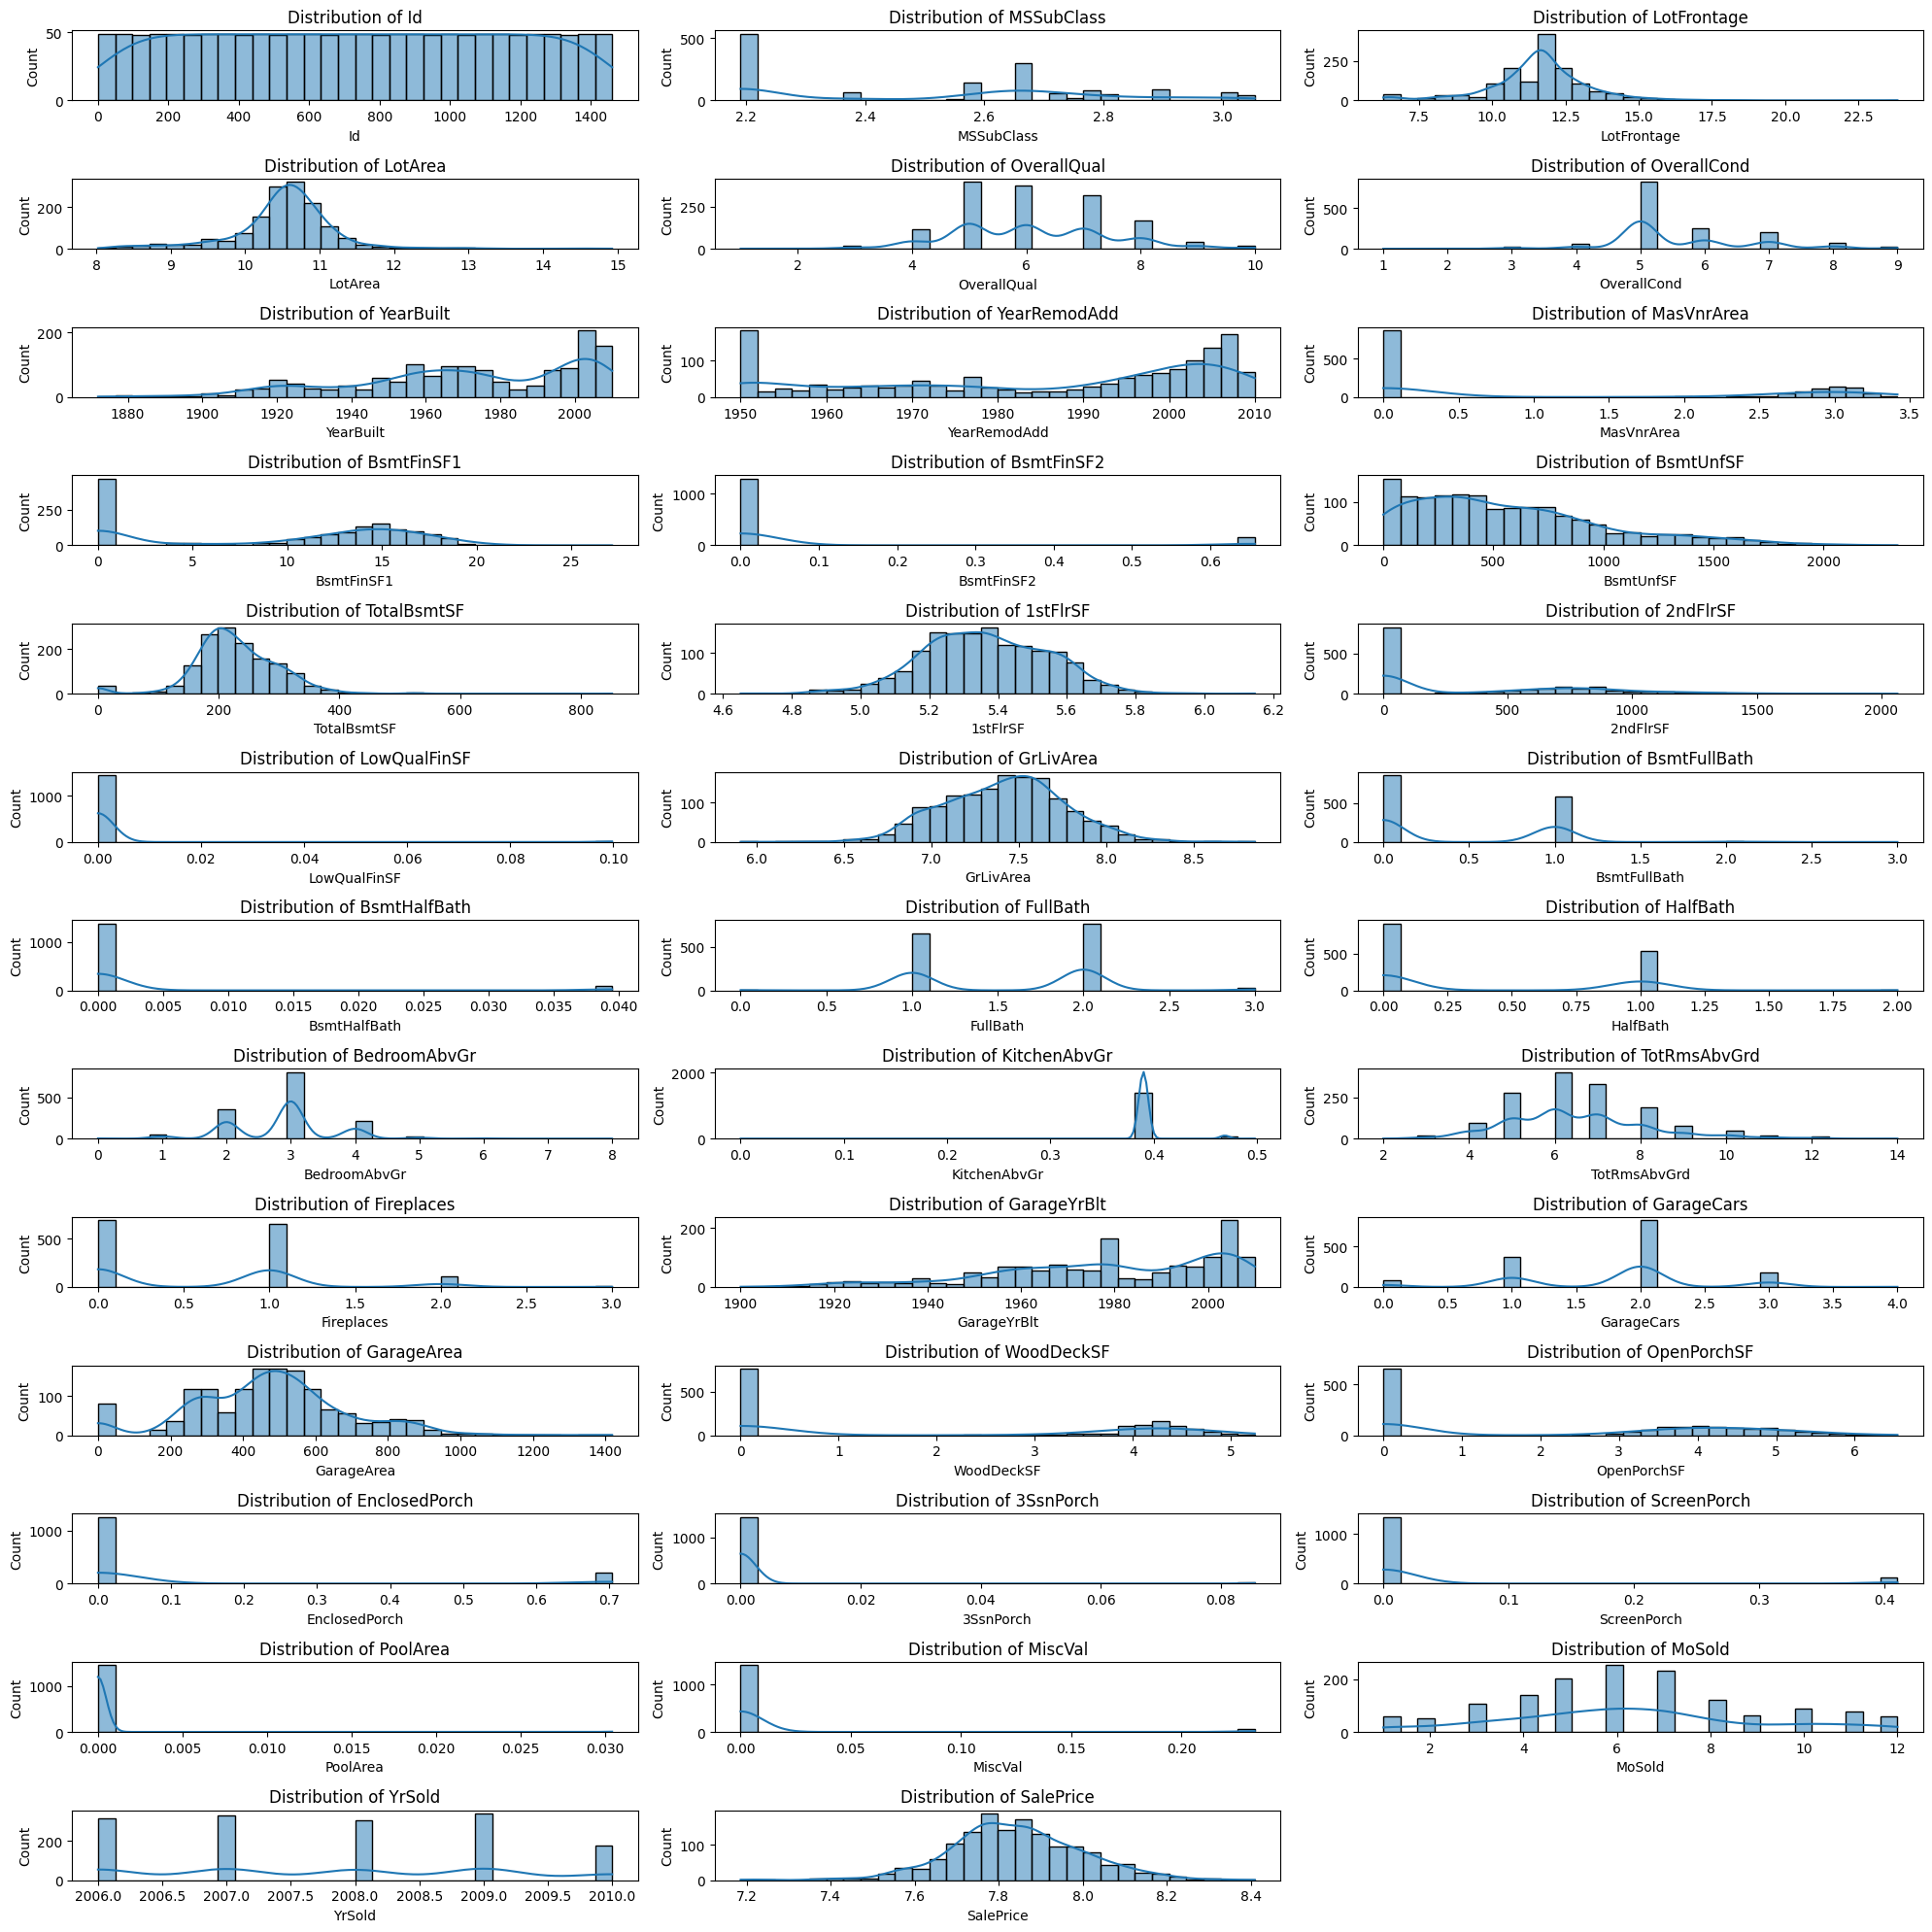

In [41]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
num_cols = 3
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // num_cols + 1, num_cols, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


### Проверка на выбросы

In [42]:
import pandas as pd

# Предположим, что у вас есть DataFrame df и список числовых признаков numeric_columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Для каждого числового признака:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Находим выбросы
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Выбросы для признака {col}: {outliers.shape[0]}")


Выбросы для признака Id: 0
Выбросы для признака MSSubClass: 0
Выбросы для признака LotFrontage: 124
Выбросы для признака LotArea: 131
Выбросы для признака OverallQual: 2
Выбросы для признака OverallCond: 125
Выбросы для признака YearBuilt: 7
Выбросы для признака YearRemodAdd: 0
Выбросы для признака MasVnrArea: 0
Выбросы для признака BsmtFinSF1: 0
Выбросы для признака BsmtFinSF2: 167
Выбросы для признака BsmtUnfSF: 29
Выбросы для признака TotalBsmtSF: 53
Выбросы для признака 1stFlrSF: 7
Выбросы для признака 2ndFlrSF: 2
Выбросы для признака LowQualFinSF: 26
Выбросы для признака GrLivArea: 10
Выбросы для признака BsmtFullBath: 1
Выбросы для признака BsmtHalfBath: 82
Выбросы для признака FullBath: 0
Выбросы для признака HalfBath: 0
Выбросы для признака BedroomAbvGr: 35
Выбросы для признака KitchenAbvGr: 68
Выбросы для признака TotRmsAbvGrd: 30
Выбросы для признака Fireplaces: 5
Выбросы для признака GarageYrBlt: 1
Выбросы для признака GarageCars: 5
Выбросы для признака GarageArea: 21
Выброс

z-score

In [43]:
from scipy.stats import zscore

for col in numeric_columns:
    df['z_score'] = zscore(df[col].dropna())
    outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
    print(f"Выбросы для признака {col}: {outliers.shape[0]}")

Выбросы для признака Id: 0
Выбросы для признака MSSubClass: 0
Выбросы для признака LotFrontage: 34
Выбросы для признака LotArea: 30
Выбросы для признака OverallQual: 2
Выбросы для признака OverallCond: 28
Выбросы для признака YearBuilt: 6
Выбросы для признака YearRemodAdd: 0
Выбросы для признака MasVnrArea: 0
Выбросы для признака BsmtFinSF1: 0
Выбросы для признака BsmtFinSF2: 0
Выбросы для признака BsmtUnfSF: 11
Выбросы для признака TotalBsmtSF: 43
Выбросы для признака 1stFlrSF: 6
Выбросы для признака 2ndFlrSF: 4
Выбросы для признака LowQualFinSF: 26
Выбросы для признака GrLivArea: 8
Выбросы для признака BsmtFullBath: 16
Выбросы для признака BsmtHalfBath: 82
Выбросы для признака FullBath: 0
Выбросы для признака HalfBath: 12
Выбросы для признака BedroomAbvGr: 14
Выбросы для признака KitchenAbvGr: 68
Выбросы для признака TotRmsAbvGrd: 12
Выбросы для признака Fireplaces: 5
Выбросы для признака GarageYrBlt: 2
Выбросы для признака GarageCars: 0
Выбросы для признака GarageArea: 7
Выбросы для

In [44]:
for col in numeric_columns:
    df['z_score'] = zscore(df[col].dropna())
    df[col] = df[col].apply(lambda x: df[col].min() if x < -3 else (df[col].max() if x > 3 else x))

### Кодирование категориальных признаков методом One-Hot

In [46]:
object_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=object_columns)
df_encoded.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=296)

### стоимость за квадратный метр (price_per_sqm)

In [47]:
df_encoded['price_per_sqm'] = df_encoded['SalePrice'] / df_encoded['GrLivArea']

### Разделение данных на обучающую и тестовую выборки

In [50]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")


Размер обучающей выборки (X_train): (1168, 296)
Размер тестовой выборки (X_test): (292, 296)


# Линейная регрессия

In [51]:
from sklearn.linear_model import LinearRegression

# Инициализация модели
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0
R^2 Score: 1.0


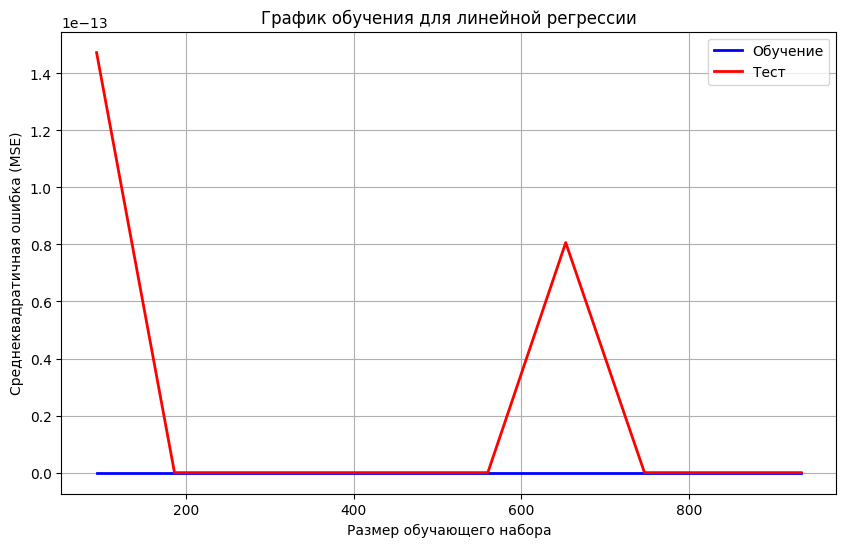

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии
model = LinearRegression()

# Получение обучающих кривых
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Преобразуем значения ошибок в положительные (так как 'learning_curve' возвращает отрицательные значения MSE)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Обучение", color='blue', lw=2)
plt.plot(train_sizes, test_scores_mean, label="Тест", color='red', lw=2)

plt.title('График обучения для линейной регрессии')
plt.xlabel('Размер обучающего набора')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
import xgboost as xgb

# Инициализация модели
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2.6795770942299698e-15
R^2 Score: 0.0
